# Data generation file

**Purpose: Generate data for use in data study of STV election resilience to Sybil attacks**

Premise: Based on inputs $C$, number of candidates and $V$, number of voters, randomly allocate voters to preference orders of candidates.

## Method 1: Placing candidates and voters in 2D space
Methodology: Generate a 1000 size grid. Randomly place candidates, with an option to normally distribute about the origin (reflecting 'normal' political centre). Randomly place voters, with an option to normally distribute about the origin. 

Calculate linear distance between each voter and every candidate. Rank linear distances with shortest-first. Return candidates and rankings paired as a list of voter preferences. 

* Will not scale for >100 candidates. Set GridSize to something that scales with C, e.g. $1000+C^3$

In [7]:
#Setup
import random
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from itertools import permutations
from math import factorial
import csv
import time


C = 5
V = 1000

GridSize = 1000

NormallyDistributeAboutOrigin = True

In [8]:
#Random point generation functions

def GenerateRandomPosition_NORMAL(GridSize):
    lower = -GridSize
    upper = GridSize
    mu,sigma = 0,GridSize/2
    Generator = scipy.stats.truncnorm((lower-mu)/sigma, (upper-mu)/sigma, loc=mu, scale=sigma)
    X,Y= Generator.rvs(2)
    return (X,Y)

def GenerateRandomPosition_UNIFORM(GridSize):
    X = random.uniform(-GridSize,GridSize)
    Y = random.uniform(-GridSize,GridSize)
    return (X,Y)

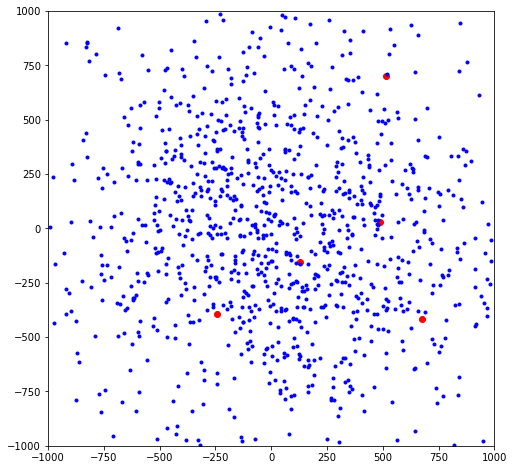

In [9]:
#Generate and plot candidate locations
if NormallyDistributeAboutOrigin == True:
    CandLocs = np.array([GenerateRandomPosition_NORMAL(GridSize) for i in range(0,C)])
    VoterLocs = np.array([GenerateRandomPosition_NORMAL(GridSize) for i in range(0,V)])
else:
    CandLocs = np.array([GenerateRandomPosition_UNIFORM(GridSize) for i in range(0,C)])
    VoterLocs = np.array([GenerateRandomPosition_UNIFORM(GridSize) for i in range(0,V)])

plt.figure(figsize=(8,8))
plt.xlim([-GridSize,GridSize])
plt.ylim([-GridSize,GridSize])
for i in range(0,C): 
    plt.plot(CandLocs[i][0],CandLocs[i][1],'ro')

for j in range(0,V):
    plt.plot(VoterLocs[j][0],VoterLocs[j][1],'b.')

In [10]:
#Calculate linear distance from each voter to each candidate and return Rankings list
#Rankings = np.empty((V,C),dtype=str)
Rankings = []
for k in range(V):
    VoterDistancesToCandidates = [np.linalg.norm(VoterLocs[k]-CandLocs[c]) for c in range(C)]
    VoterRankings = scipy.stats.rankdata(VoterDistancesToCandidates)
    VoterCandidateOrder = {"C"+str(int(i+1)):int(VoterRankings[i]) for i in range(C)}#{"C"+str(int(i+1)):list(np.where(VoterRankings==i+1)[0])[0]+1 for i in range(C)}
    #VoterCandidateOrder = [for l in VoterRankings]
    
    #VoterCandidateOrder = ["C"+str(int(i)) for i in VoterRankings]
    #Rankings[k] = VoterCandidateOrder
    Rankings.append(VoterCandidateOrder)

print(Rankings[:2],"...", Rankings[-1:])


[{'C1': 1, 'C2': 2, 'C3': 3, 'C4': 5, 'C5': 4}, {'C1': 2, 'C2': 3, 'C3': 4, 'C4': 1, 'C5': 5}] ... [{'C1': 2, 'C2': 1, 'C3': 3, 'C4': 4, 'C5': 5}]


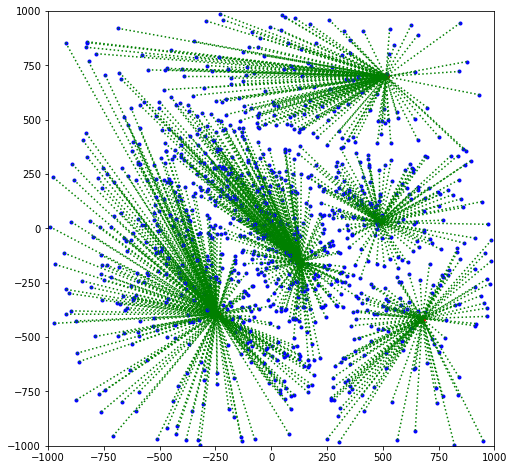

In [11]:
#Plotting the 1st choice candidates for each voter, for fun
#Since this cell won't be used often it redoes some of the code above (to avoid integrating them)
plt.figure(figsize=(8,8))
plt.xlim([-GridSize,GridSize])
plt.ylim([-GridSize,GridSize])
for i in range(0,C): 
    plt.plot(CandLocs[i][0],CandLocs[i][1],'ro')

for j in range(0,V):
    plt.plot(VoterLocs[j][0],VoterLocs[j][1],'b.')
    VoterDistancesToCandidates = [np.linalg.norm(VoterLocs[j]-Cand) for Cand in CandLocs]
    VoterRankings = scipy.stats.rankdata(VoterDistancesToCandidates)
    FaveCandidateLoc = CandLocs[np.where(VoterRankings==1)[0]][0]
    plt.plot((VoterLocs[j][0],FaveCandidateLoc[0]),(VoterLocs[j][1],FaveCandidateLoc[1]),"g",ls='dotted')
    #plt.plot(VoterLocs[j],FaveCandidateLoc,'-g')
    

In [20]:
#Verify that the number of first-choice votes looks consistent with the image
for i in range(1,C+1):
    #Number = len([Rankings[i] if Rankings[i][0]==str("C"+i) for i in range(C)]) # really wanted to one-line this but don't know how
    FirstChoices = 0
    for j in range(V):
        if Rankings[j]["C"+str(i)]==1:
            FirstChoices += 1
    print("C",str(i)," has ",FirstChoices," first choices.")
print(Rankings)

csv_columns = ["C"+str(i) for i in range(1,C+1)]
csv_file = "Exports/Export"+str(time.time())+".csv"
with open(csv_file, 'w') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=csv_columns)
    writer.writeheader()
    for data in Rankings:
        writer.writerow(data)

C 1  has  26  first choices.
C 2  has  24  first choices.
C 3  has  18  first choices.
C 4  has  12  first choices.
C 5  has  20  first choices.
[{'C1': 1, 'C2': 3, 'C3': 5, 'C4': 4, 'C5': 2}, {'C1': 1, 'C2': 4, 'C3': 5, 'C4': 3, 'C5': 2}, {'C1': 3, 'C2': 4, 'C3': 1, 'C4': 5, 'C5': 2}, {'C1': 3, 'C2': 5, 'C3': 1, 'C4': 4, 'C5': 2}, {'C1': 1, 'C2': 4, 'C3': 5, 'C4': 2, 'C5': 3}, {'C1': 2, 'C2': 4, 'C3': 5, 'C4': 1, 'C5': 3}, {'C1': 2, 'C2': 5, 'C3': 3, 'C4': 4, 'C5': 1}, {'C1': 1, 'C2': 2, 'C3': 5, 'C4': 4, 'C5': 3}, {'C1': 1, 'C2': 2, 'C3': 5, 'C4': 4, 'C5': 3}, {'C1': 2, 'C2': 5, 'C3': 4, 'C4': 3, 'C5': 1}, {'C1': 1, 'C2': 4, 'C3': 5, 'C4': 3, 'C5': 2}, {'C1': 1, 'C2': 4, 'C3': 5, 'C4': 2, 'C5': 3}, {'C1': 2, 'C2': 1, 'C3': 5, 'C4': 4, 'C5': 3}, {'C1': 3, 'C2': 5, 'C3': 1, 'C4': 4, 'C5': 2}, {'C1': 2, 'C2': 5, 'C3': 3, 'C4': 4, 'C5': 1}, {'C1': 2, 'C2': 1, 'C3': 5, 'C4': 3, 'C5': 4}, {'C1': 2, 'C2': 5, 'C3': 4, 'C4': 3, 'C5': 1}, {'C1': 2, 'C2': 4, 'C3': 5, 'C4': 1, 'C5': 3}, {'C1': 2

In [7]:
#Not yet used: how do we want the data type in the end?

#Pair CandLocs and VoterLocs up to voter and candidate numbers
CandDict = {str("C")+str(i):CandLocs[i] for i in range(0,C)}
CandDict

{'C0': array([-271.12123438,  107.19134852]),
 'C1': array([ -43.84277531, -715.88364612]),
 'C2': array([385.31843048, 773.42531336]),
 'C3': array([-557.33333014, -322.29346525]),
 'C4': array([-266.39575163,  222.79088945])}

# Method 2: Urn Model
An alternative method of drawing data. All $m!$ possible votes are enumerated and 'placed into an urn'. A draw takes place, the vote is recorded and $a$ (variable parameter) additional votes of the same type are added back into the urn. 

In [8]:
# Enumerate all possible votes
# Simple case of taking all possible orders of C

def Urn_Model(C,V,A=factorial(C)):
    Urn = list(permutations([i for i in range(1,C+1)]))
    Votes = np.zeros((V,C))

    for v in range(0,V):
        Pick = Urn[np.random.randint(0,len(Urn))]
        Votes[v] = Pick
        Urn.extend([Pick for i in range(0,A)])
    return Votes

def FirstChoiceDistribution(Votes,C):
    FirstChoices = np.zeros(C)
    for v in Votes:
        FirstChoices[int(v[0])-1]+=1
    plt.bar([i for i in range(1,C+1)],FirstChoices)

[[1. 4. 3. 5. 2.]
 [1. 4. 3. 5. 2.]
 [4. 1. 3. 2. 5.]
 [5. 1. 2. 3. 4.]
 [4. 1. 3. 2. 5.]
 [5. 1. 2. 3. 4.]
 [1. 4. 3. 5. 2.]
 [1. 4. 3. 5. 2.]
 [2. 5. 4. 1. 3.]
 [1. 4. 3. 5. 2.]
 [4. 1. 3. 2. 5.]
 [4. 1. 3. 2. 5.]]


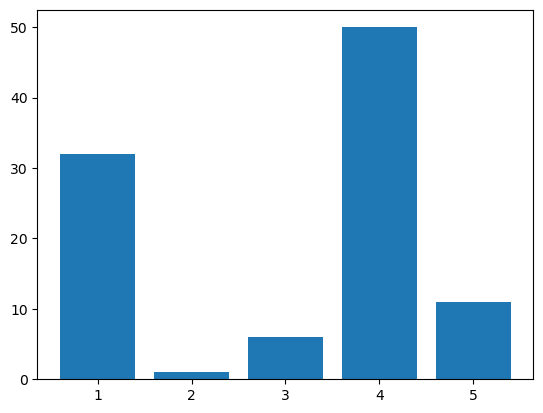

In [9]:
Votes = Urn_Model(C,V)
print(Votes[0:12])
    
FirstChoiceDistribution(Votes,C)